In [213]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
!pip install numpy

In [5]:
df=pd.read_csv('marketing_campaign_dataset.csv')

In [6]:
df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Date,Clicks,Impressions,Engagement_Score,Customer_Segment
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,"$16,174.00",6.29,Chicago,1/1/2021,506,1922,6,Health & Wellness
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,"$11,566.00",5.61,New York,1/2/2021,116,7523,7,Fashionistas
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,1/3/2021,584,7698,1,Outdoor Adventurers
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,"$12,724.00",5.55,Miami,1/4/2021,217,1820,7,Health & Wellness
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,"$16,452.00",6.50,Los Angeles,1/5/2021,379,4201,3,Health & Wellness


In [8]:
df.shape

(200005, 15)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200005 entries, 0 to 200004
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       200005 non-null  int64  
 1   Company           200005 non-null  object 
 2   Campaign_Type     200005 non-null  object 
 3   Target_Audience   200005 non-null  object 
 4   Duration          200005 non-null  object 
 5   Channel_Used      200005 non-null  object 
 6   Conversion_Rate   200005 non-null  float64
 7   Acquisition_Cost  200005 non-null  object 
 8   ROI               200005 non-null  float64
 9   Location          200005 non-null  object 
 10  Date              200005 non-null  object 
 11  Clicks            200005 non-null  int64  
 12  Impressions       200005 non-null  int64  
 13  Engagement_Score  200005 non-null  int64  
 14  Customer_Segment  200005 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 22.9+ MB


In [19]:
pd.DataFrame(df.isnull().sum(), columns = ['Num'])

,Num
Campaign_ID,0
Company,0
Campaign_Type,0
Target_Audience,0
Duration,0
Channel_Used,0
Conversion_Rate,0
Acquisition_Cost,0
ROI,0
Location,0


## Further find the number of unique channels, their percentages and save as a table for the report

In [90]:
Channel = df['Channel_Used'].value_counts()

In [91]:
# Find the percentages of the result in a percent seriers and round it to 2 decimals
Percent = 100*Channel/sum(Channel)
Percent = Percent.round(2)
Percent

Channel_Used
Email         16.80
Google Ads    16.72
YouTube       16.70
Instagram     16.70
Website       16.68
Facebook      16.41
Name: count, dtype: float64

In [115]:
# Combine both results into a dataframe via a dictyionary and check to see the output
Unique_Channels = pd.DataFrame({'Channel': Channel.index, 'Counts': Channel.values, 'Percentage_Count(%)': Percent.values})
Unique_Channels.head()

,Channel,Counts,Percentage_Count(%)
0,Email,33599,16.80
1,Google Ads,33440,16.72
2,YouTube,33393,16.70
3,Instagram,33392,16.70
4,Website,33361,16.68


In [118]:
Unique_Channels.to_csv('Unique_Channel.csv')

## Find the unique target audiences, their counts and their percentages and save as a table for the report

In [97]:
target = df['Target_Audience'].value_counts()

In [99]:
perccent = (100*target/sum(target)).round(2)
perccent

Target_Audience
Men 18-24      20.13
Men 25-34      20.01
All Ages       20.01
Women 25-34    20.01
Women 35-44    19.84
Name: count, dtype: float64

In [105]:
Unique_Target_Count = pd.DataFrame({'Counts': target.values, 'Percentage (%)': perccent})
Unique_Target_Count.head()

,Counts,Percentage (%)
Target_Audience,,
Men 18-24,40259,20.13
Men 25-34,40024,20.01
All Ages,40021,20.01
Women 25-34,40013,20.01
Women 35-44,39688,19.84


In [108]:
Unique_Target_Count.to_csv('Unique Audience Table.csv')

## Find the unique campaign type, their counts and their percentages and save as a table for the report

In [122]:
campaigns = df['Campaign_Type'].value_counts()
camp_percent = (100*campaigns/sum(campaigns)).round(2)
campaigns
Unique_Campaign_Type = pd.DataFrame({'Counts': campaigns.values, 'Percentage (%)': camp_percent})
Unique_Campaign_Type.head()

,Counts,Percentage (%)
Campaign_Type,,
Influencer,40170,20.08
Search,40157,20.08
Display,39988,19.99
Email,39871,19.94
Social Media,39819,19.91


In [123]:
Unique_Campaign_Type.to_csv('Unique_Campaign_Type.csv')

## Explore how the type of channel used influences campaign effectiveness (Conversion Rate) and theaverage profit achieved (Return on Investment)

In [110]:
df.columns

Index(['Campaign_ID', 'Company', 'Campaign_Type', 'Target_Audience',
       'Duration', 'Channel_Used', 'Conversion_Rate', 'Acquisition_Cost',
       'ROI', 'Location', 'Date', 'Clicks', 'Impressions', 'Engagement_Score',
       'Customer_Segment'],
      dtype='object')

In [174]:
import numpy as np
bb = (df.groupby('Channel_Used')['Conversion_Rate'].mean()).sort_values(ascending = False)
ConverRate_Channel = pd.DataFrame({'Channel': bb.index, 'Mean_Conversion_Rate': bb.values,'Conversion Rank':[1,2,3,4,5,6]})
ConverRate_Channel

,Channel,Mean_Conversion_Rate,Conversion Rank
0,Email,0.080282,1
1,Website,0.080182,2
2,Google Ads,0.080181,3
3,Facebook,0.079990,4
4,YouTube,0.079890,5
5,Instagram,0.079886,6


In [181]:
bROI = (df.groupby('Channel_Used')['ROI'].mean()).sort_values(ascending = False)
ROI_Channel = pd.DataFrame({'Channel': bROI.index, 'Mean_ROI_Rate': bROI.values,'ROI Rank':[1,2,3,4,5,6]})
ROI_Channel

,Channel,Mean_ROI_Rate,ROI Rank
0,Facebook,5.018672,1
1,Website,5.014114,2
2,Google Ads,5.003126,3
3,Email,4.996487,4
4,YouTube,4.993720,5
5,Instagram,4.988706,6


In [185]:
Channel_Explored = pd.merge(ConverRate_Channel, ROI_Channel, on = 'Channel', how = 'inner')
Channel_Explored

,Channel,Mean_Conversion_Rate,Conversion Rank,Mean_ROI_Rate,ROI Rank
0,Email,0.080282,1,4.996487,4
1,Website,0.080182,2,5.014114,2
2,Google Ads,0.080181,3,5.003126,3
3,Facebook,0.079990,4,5.018672,1
4,YouTube,0.079890,5,4.993720,5
5,Instagram,0.079886,6,4.988706,6


In [186]:
Channel_Explored.to_csv('Explore_Channels.csv')

### This discovery makes me want to check the cost and know which oif the channels was more costly to run and lead to the below line of codes

In [ ]:
### The code did not initially work, so I had to find out why and saw that the Acquisition Cost column had a dollar symbol; and is therefore seen as a string.
### This symbol neded to be  extracted first using regular expression \d+ before it canbe used for the calculation as below


In [200]:
Acqu_Cost_Value = df['Acquisition_Cost'].str.extract('(\d+)', expand = False). astype (float)
# Acqu_Cost_Value
df['Acqu_Cost_Value'] = Acqu_Cost_Value

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\DELL\AppData\Local\Temp\ipykernel_8184\2800714112.py:1: SyntaxWarning: invalid escape sequence '\d'
  Acqu_Cost_Value = df['Acquisition_Cost'].str.extract('(\d+)', expand = False). astype (float)


In [201]:
ac = (df.groupby('Channel_Used')['Acqu_Cost_Value'].mean()).sort_values(ascending = False)
AcquiCost_Channel = pd.DataFrame({'Channel': ac.index, 'Mean_Acquisition Cost': ac.values,'Conversion Rank':[6,5,4,3,2,1]})
AcquiCost_Channel

,Channel,Mean_Acquisition Cost,Conversion Rank
0,Email,12.029287,6
1,Google Ads,12.029246,5
2,Facebook,12.012340,4
3,Instagram,11.992244,3
4,Website,11.986751,2
5,YouTube,11.982511,1


### The findings are not significant so it wont be included in the analysis and report

## Now lets do some relationship analysis and visualizations

In [207]:
df.columns

Index(['Campaign_ID', 'Company', 'Campaign_Type', 'Target_Audience',
       'Duration', 'Channel_Used', 'Conversion_Rate', 'Acquisition_Cost',
       'ROI', 'Location', 'Date', 'Clicks', 'Impressions', 'Engagement_Score',
       'Customer_Segment', 'Acqu_Cost_Value'],
      dtype='object')

<Axes: >

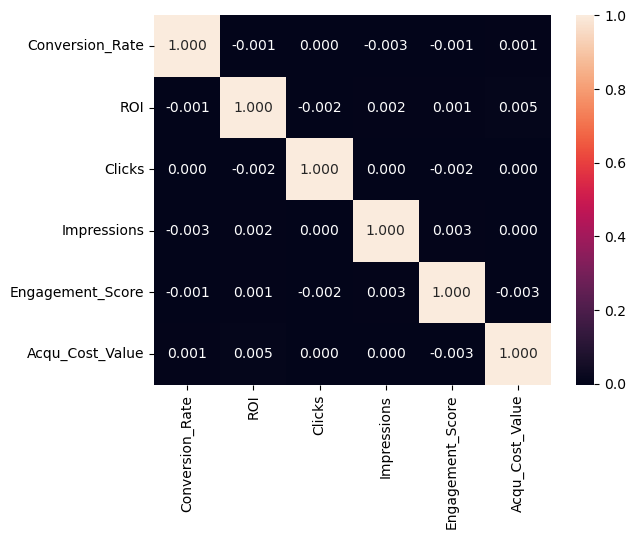

In [221]:
df1 = df[['Conversion_Rate','ROI','Clicks', 'Impressions', 'Engagement_Score','Acqu_Cost_Value']]
correlation = df1.corr()
# sns.heatmap(correlation, xticklabels = 'correlation.columns', yticklabels = 'correlation.columns', annot = True)
sns.heatmap(correlation, fmt = '.3f', annot = True)  #Formatting the correlation coefficient values to 3 significant figures

### we can conclude that there are no significant correlational relationship between our variables

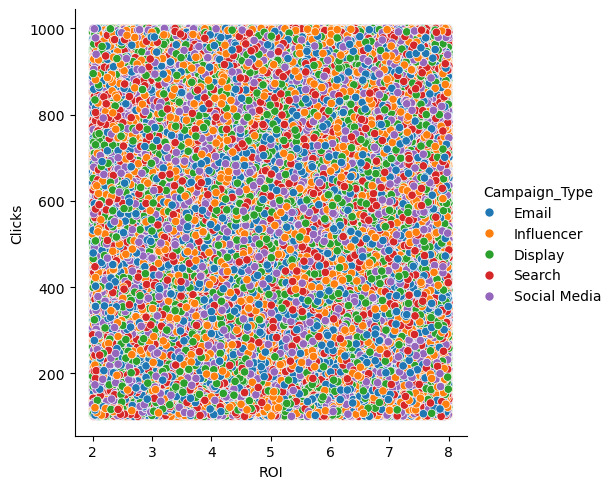

In [224]:
sns.relplot( x = 'ROI', y = 'Clicks', hue = 'Campaign_Type', data = df)

#### I tried to examine whether any particular location has preference for a particular type of campaign method and found that there is no significant preferences for one campaign type to another among the channels

<function matplotlib.pyplot.show(close=None, block=None)>

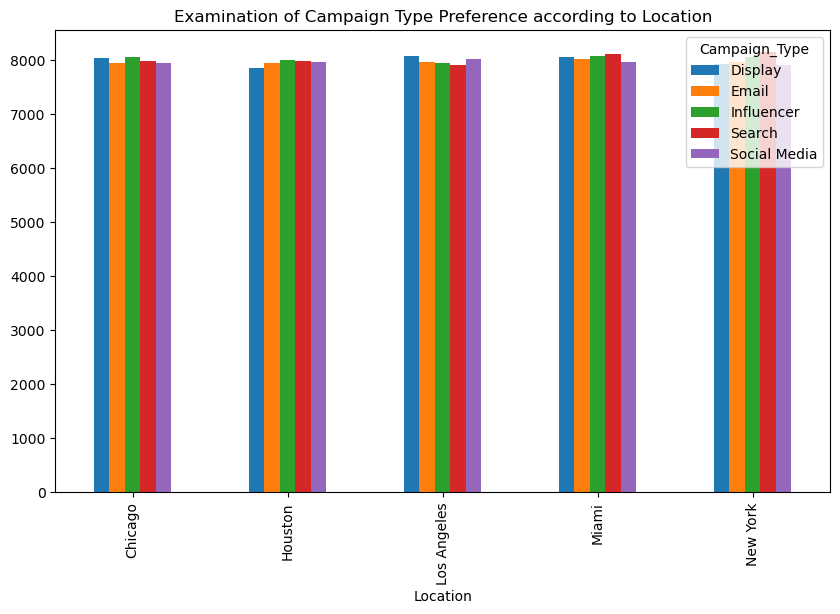

In [233]:
import matplotlib.pyplot as plt
pd.crosstab(df['Location'], df['Campaign_Type']).
        plot(kind = 'bar', figsize = (10,6)
            )
plt.title ('Examination of Campaign Type
            Preference according to Location'
            )
plt.show

In [227]:
df.columns

Index(['Campaign_ID', 'Company', 'Campaign_Type', 'Target_Audience',
       'Duration', 'Channel_Used', 'Conversion_Rate', 'Acquisition_Cost',
       'ROI', 'Location', 'Date', 'Clicks', 'Impressions', 'Engagement_Score',
       'Customer_Segment', 'Acqu_Cost_Value'],
      dtype='object')

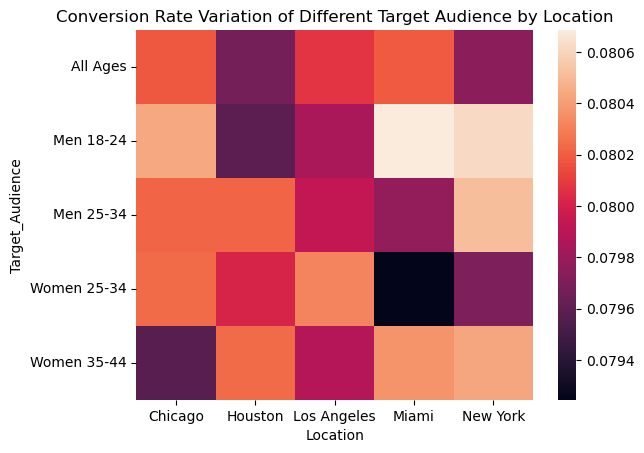

In [246]:
pivot = df.pivot_table(index = 'Target_Audience', columns = 'Location',
                       values = 'Conversion_Rate', aggfunc = 'mean')
sns.heatmap(pivot, annot= False)
plt.title('Conversion Rate Variation of Different Target Audience by Location')
plt.show()

### from the graph, the light coloured regions represent the regions of comparatievly highest conversion rate / campaign effectiveness.
### We can therefore conclude that in three of the locations (New York, Miami, and Chicago), campaigns targeted at men aged 18-24 had the highedt effectiveness while women aged 25-34 years had the highest conversion rate in Los Angeles
### It is therefore recommeneded that men aged 18-24 should be targeted more in the afore listed states while women aged 25 - 34 should be given more focus in Los Angeles

<function matplotlib.pyplot.show(close=None, block=None)>

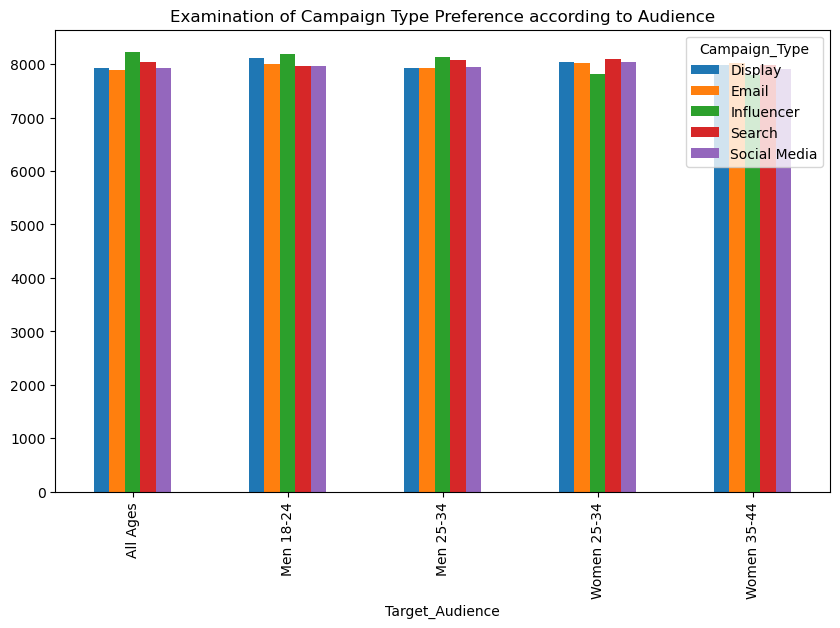

In [248]:
import matplotlib.pyplot as plt
pd.crosstab(df['Target_Audience'], df['Campaign_Type']).plot(kind = 'bar', figsize = (10,6))
plt.title ('Examination of Campaign Type Preference according to Audience')
plt.show

### plot a pie chart of the acquisition cost by channel used

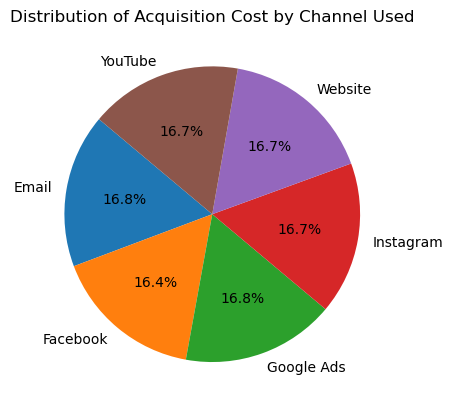

In [253]:
Pie_values = df.groupby('Channel_Used')['Acqu_Cost_Value'].sum()
plt.pie(Pie_values, labels =Pie_values.index, autopct = '%1.1f%%', startangle = 140, colors = plt.cm.tab10.colors)
plt.title ('Distribution of Acquisition Cost by Channel Used')
plt.show()